# Plots of CCLM domains

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import valenspy as vp


# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'


manager = vp.InputManager(machine=machine)



In [24]:
years_to_analyse = range(1980,1985)

#ds_obs = ds_obs.sel(time = ds_obs.time.dt.year.isin(1995))

In [3]:
ds_mod_cpm = manager.load_data(model, ['tas'], freq="daily", path_identifiers=["BE28_Nukleus", "mean"])


File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/BE28_Nukleus/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [13]:
ds = ds_mod_cpm.isel(time=1)
# 1. Extract the top and bottom rows (along rlat)
top = ds.isel(rlat=0)  # First row (top)
bottom = ds.isel(rlat=-1)  # Last row (bottom)

# 2. Extract the left and right columns (along rlon), except for the corners already covered by top and bottom
left = ds.isel(rlon=0).isel(rlat=slice(1, -1))  # First column (left), excluding corners
right = ds.isel(rlon=-1).isel(rlat=slice(1, -1))  # Last column (right), excluding corners

# 3. Concatenate the selections
# Concatenate top and bottom across the rlon dimension (full width of domain)
top_bottom = xr.concat([top, bottom], dim='rlat')

# Concatenate left and right across the rlat dimension (height of domain, excluding already selected corners)
left_right = xr.concat([left, right], dim='rlon')

# 4. Combine both along the appropriate dimensions
border_cells = xr.concat([top_bottom, left_right], dim='rlat')

da_border_cells = border_cells['tas']


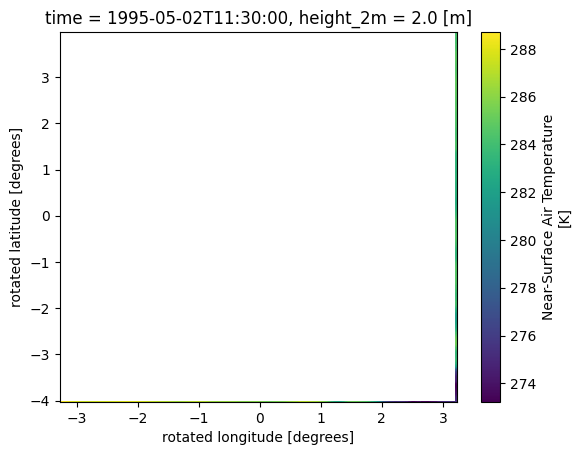

In [14]:
da_border_cells_sorted = da_border_cells.sortby(['rlat', 'rlon'])

# Now plot the sorted DataArray
da_border_cells_sorted.plot()

In [9]:
experiments = ["EUR11_1994_NU_TT_EC_TSO"]  #["CB2_CCLM_EUR11_ERA5_evaluation_urb"]

In [11]:
ds_eur11 = manager.load_data(model, ['pr'], freq="daily", path_identifiers=["EUR11_CO_TA_GC_TSO", "sum"])




File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/EUR11_CO_TA_GC_TSO/TOT_PREC/daily/TOT_PREC_daysum.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['pr']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [15]:
ds_eur11['pr']

<xarray.DataArray 'pr' (time: 123, rlat: 434, rlon: 446)> Size: 190MB
dask.array<truediv, shape=(123, 434, 446), dtype=float64, chunksize=(123, 434, 446), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 984B 1995-05-01T11:30:00 ... 1995-08-31T08...
    lon      (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
    lat      (rlat, rlon) float32 774kB dask.array<chunksize=(434, 446), meta=np.ndarray>
  * rlon     (rlon) float32 2kB -29.58 -29.48 -29.36 ... 19.15 19.25 19.36
  * rlat     (rlat) float32 2kB -24.58 -24.48 -24.36 ... 22.83 22.93 23.05
Attributes:
    standard_name:       precipitation_flux
    long_name:           Precipitation
    units:               kg m-2 s-1
    grid_mapping:        rotated_pole
    cell_methods:        time: sum
    original_name:       TOT_PREC
    original_long_name:  total precipitation amount
    original_units:      kg m-2
    freq:                daily
    path_identifiers:    ['EUR11_CO_TA_GC_TSO', 'sum']
    dataset:             CCLM

In [21]:
ds_eur11['pr'].where(da_border_cells_sorted)

<xarray.DataArray 'pr' (time: 123, rlat: 0, rlon: 0)> Size: 0B
dask.array<where, shape=(123, 0, 0), dtype=float64, chunksize=(123, 0, 0), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 984B 1995-05-01T11:30:00 ... 1995-08-31T...
  * rlon       (rlon) float32 0B 
  * rlat       (rlat) float32 0B 
    lon        (rlat, rlon) float32 0B 
    lat        (rlat, rlon) float32 0B 
    height_2m  float32 4B ...
Attributes:
    standard_name:       precipitation_flux
    long_name:           Precipitation
    units:               kg m-2 s-1
    grid_mapping:        rotated_pole
    cell_methods:        time: sum
    original_name:       TOT_PREC
    original_long_name:  total precipitation amount
    original_units:      kg m-2
    freq:                daily
    path_identifiers:    ['EUR11_CO_TA_GC_TSO', 'sum']
    dataset:             CCLM

In [22]:
da_border_cells_sorted

<xarray.DataArray 'tas' (rlat: 320, rlon: 260)> Size: 333kB
dask.array<getitem, shape=(320, 260), dtype=float32, chunksize=(108, 1), chunktype=numpy.ndarray>
Coordinates:
  * rlon       (rlon) float32 1kB -3.263 -3.238 -3.213 ... 3.162 3.187 3.212
  * rlat       (rlat) float32 1kB -4.013 -3.988 -3.963 ... 3.912 3.937 3.962
    time       datetime64[ns] 8B 1995-05-02T11:30:00
    lon        (rlat, rlon) float32 333kB -0.4832 -0.4471 ... 9.695 9.738
    lat        (rlat, rlon) float32 333kB 46.37 46.37 46.37 ... 54.33 54.33
    height_2m  float32 4B ...
Attributes:
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    units:               K
    grid_mapping:        rotated_pole
    cell_methods:        time: point
    original_name:       T_2M
    original_long_name:  2m temperature
    original_units:      K
    freq:                daily
    path_identifiers:    ['BE28_Nukleus', 'mean']
    dataset:             CCLM